#  Linear Regression

Linear Regression is a statistical technique that is used to find the linear relationship between a dependent and one or more independent variables. 

This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

## Modeling the linear relationship between TV ad spending and product sales

In this example, we will build a Simple Linear Regression model to study the linear relationship between the TV ad spending and product sales for a breakfast cereal.

<image src="tv-ad.gif"/>

## Simple Linear Regression

Simple Linear Regression is one of the simplest models in machine learning. It models the linear relationship between the independent and dependent variables.

In this example, there is one independent or input variable that represents the TV ad spending data and is denoted by X. Similarly, there is one dependent or output variable that represents the product sales data and is denoted by y. 

We want to build a linear relationship between these variables. This linear relationship can be modeled by a mathematical equation of the form:

$$ y = m(x) + b $$

**where:** 

$ x $ is the dependent variable

$ y $ is the independent variable

$ b $ is the intercept

$ m $ is slope

### Step 1: Import the necessary packages

In [1725]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Step 2: Analyze the dataset

Import the dataset into the dataframe with the standard read_csv() function of the pandas library and assign it to the df variable. Then, conduct exploratory data analysis to get a feel for the data.

In [1726]:
df = pd.read_csv("advertisement.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [1727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [1728]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


#### Visualize the data

<Axes: xlabel='TV', ylabel='Sales'>

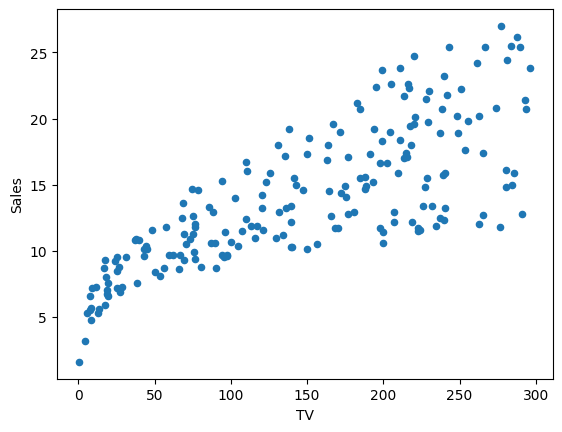

In [1729]:
df.plot(x='TV',y='Sales',kind='scatter')

### Step 4: Split the dataset into a training set and a testing set

In [1730]:
X = df['TV'].values
y = df['Sales'].values

In [1731]:
# Reshape X from a one dimensional array into a two dimensional array
X = X.reshape(-1,1)

# Reshape X from a one dimensional array into a two dimensional array
y = y.reshape(-1,1)

In [1732]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1733]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(134, 1)
(134, 1)
(66, 1)
(66, 1)


### Step 5: Create the Model

In [1734]:
# Create an instance the linear regression class 
lr_model = LinearRegression()

# Train the model using training data sets
lr_model.fit(X_train,y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

### Step 6: Get the slope and intercept

In [1735]:
# Slope
m = lr_model.coef_[0]
m = m[0]

# Intercept
b = lr_model.intercept_[0]

print("b = ", b)
print("m = ", m)
print("y = ", m, "* x + ", b)

b =  7.066582521696444
m =  0.04822451281515249
y =  0.04822451281515249 * x +  7.066582521696444


### Step 7: Draw the Regression Line

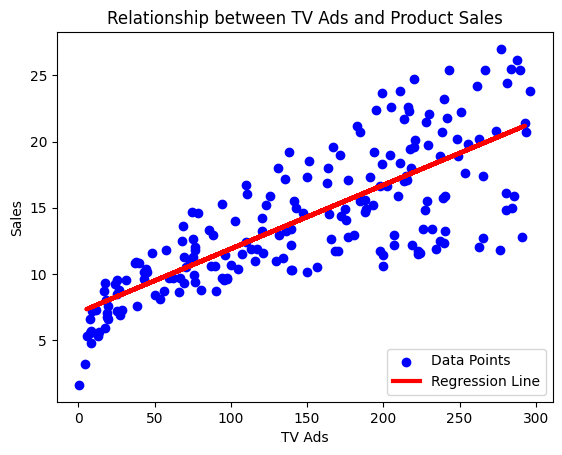

In [1736]:
plt.scatter(X, y, color = 'blue', label='Data Points')
plt.plot(X_test, y_pred, color = 'red', linewidth=3, label = 'Regression Line')
plt.title('Relationship between TV Ads and Product Sales')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.legend(loc=4)
plt.show()

### Step 8: Loss Function

- Compute the Sum of Squared Error

In [1737]:
# Reshape y_test from a two dimensional array back to a one dimensional array
y_test = y_test.reshape(-1)

# Reshape y_pred from a two dimensional array back to a one dimensional array
y_pred = y_pred.reshape(-1)

df1 = pd.DataFrame({'Actual_Sales': y_test, 'Predicted_Sales':y_pred})

In [1738]:
df1.head()

,Actual_Sales,Predicted_Sales
0,16.9,14.941645
1,22.4,16.489652
2,21.4,21.191542
3,7.3,7.630809
4,24.7,17.690443


In [1739]:
sum_of_squared_errors = str(np.sum(np.square(df1['Actual'] - df1['Predicted'])))

print('residual sum of squares is : ', sum_of_squared_errors)

residual sum of squares is :  641.0056895300172
